In [1]:
!pip install yfinance
!pip install beautifulsoup4
!pip install pandas
!pip install requests
!pip install bs4
!pip install plotly



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Question 1: Use yfinance to Extract Stock Data

In [4]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period = "max")
tesla_data.reset_index(inplace = True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Question 2: Use Webscraping to Extract Tesla Revenue Data

In [5]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html5lib')

In [6]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data  = requests.get(url).text
soup = BeautifulSoup(html_data, 'html5lib')
temp_dict={"Date":[], "Revenue":[]}
for row in soup.find_all("tbody")[1].find_all('tr'):
    col = row.find_all("td")
    for i,cell in enumerate(col):
        temp_dict[list(temp_dict.keys())[i]].append(cell.text)
tesla_revenue=pd.DataFrame.from_dict(temp_dict)
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace('$', " ")

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


Question 3: Use yfinance to Extract Stock Data

In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
gmstp = yf.Ticker("GME")
gme_data = gmstp.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712706,1.716073,1.670625,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


Question 4: Use Webscraping to Extract GME Revenue Data

In [9]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html5lib')

In [10]:
gme_revenue_tables = soup.find_all("table")
gme_revenue_table = None
for index, table in enumerate(gme_revenue_tables):
    if "GameStop Quarterly Revenue" in str(table):
        gme_revenue_table = table
rows = []
for row in gme_revenue_table.tbody.find_all("tr"):
    col = row.find_all("td")
    if col:
        date = str(col[0].string)
        revenue = str(col[1].string)
        rows.append({"Date": date, "Revenue": revenue})

gme_revenue = pd.DataFrame(rows)
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace("$", " ")
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != "None"]
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,"1,667"
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


In [16]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing=0.3)

    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']

    stock_data_specific['Date'] = pd.to_datetime(stock_data_specific['Date'])
    revenue_data_specific['Date'] = pd.to_datetime(revenue_data_specific['Date'])

    revenue_data_specific['Revenue'] = revenue_data_specific['Revenue'].str.replace(',', '').str.replace('$', '').astype(float)
    fig.add_trace(go.Scatter(x=stock_data_specific.Date, y=stock_data_specific.Close.astype(float), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=revenue_data_specific.Date, y=revenue_data_specific.Revenue, name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False, height=900, title=stock, xaxis_rangeslider_visible=True)
    fig.show()

C:\Users\adipa\AppData\Local\Temp\ipykernel_11708\656202875.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\adipa\AppData\Local\Temp\ipykernel_11708\656202875.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\adipa\AppData\Local\Temp\ipykernel_11708\656202875.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

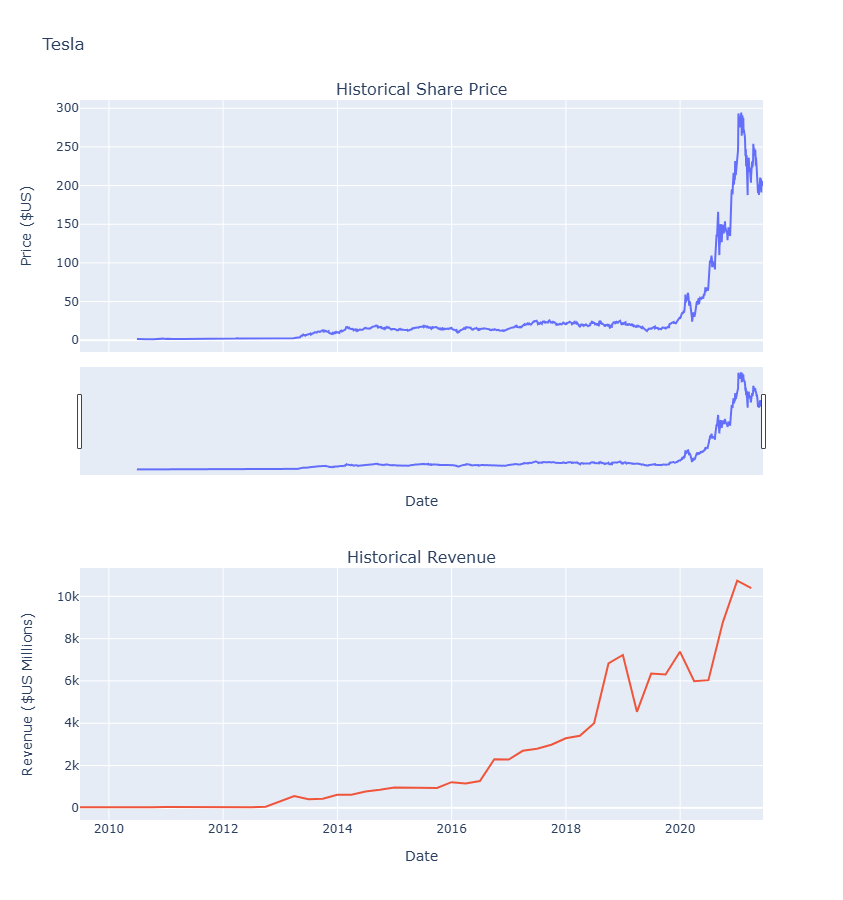

In [17]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

C:\Users\adipa\AppData\Local\Temp\ipykernel_11708\656202875.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



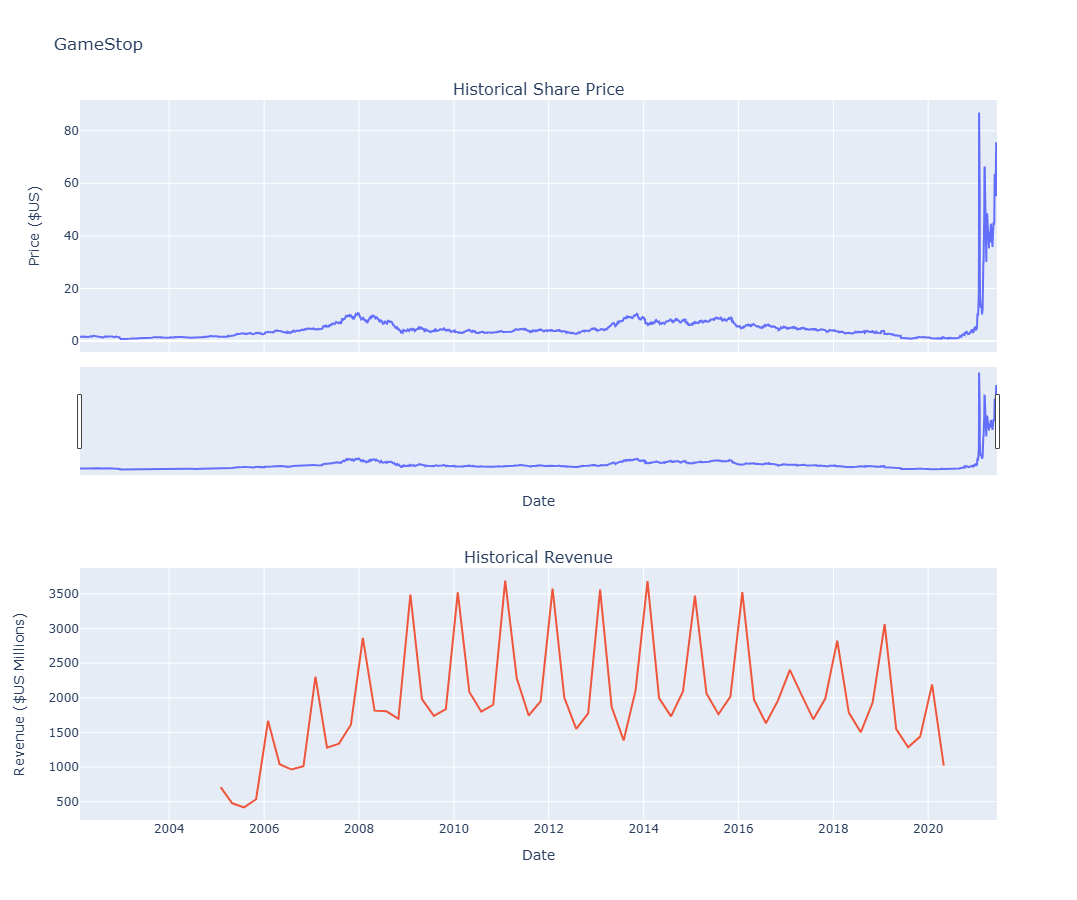

In [18]:
make_graph(gme_data, gme_revenue, 'GameStop')